In [1]:
import matplotlib
%matplotlib nbagg

/usr/local/lib/python2.7/dist-packages/ipython-4.0.0-py2.7.egg/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Analyzing the number of internodes per growth unit

**Abstract**
This notebook aims at analyzing the number of nodes of growth units in selected architectural  position considering the respective roles of preformation and neoformation using

* comparison tests,
* one-way variance analysis,
* estimation of finite mixture of distributions.

**Keywords**
comparison test; anova; finite mixture; architecture analysis;

## Introduction

## Material & methods

Data sets files are avaible in the `../share/data` directory.

* Wild cherry tree, number of nodes per growth unit (GU), 

    * data: Dominique Fournier,
    * files: 
    
        * meri1.his: order 1,
        * meri2.his: order 2,
        * meri3.his: order 3, GU 1,
        * meri4.his: order 3, GU 2,
        * meri5.his: short shoots.
        
* Poplar:,number of nodes per growth unit, 

    * data: Yves Caraglio and Herve Rey,
    * files:
      
        * peup1.his: order 2,
        * peup2.his: order 3,
        * peup3.his: order 4,
        * peup4.his: order 5,
        * peup5.his: order 3, GU 4,
        * peup6.his: order 3, acrotony.
        
## Results

In [2]:
from openalea.stat_tool.__stat_tool import stat_tool
from openalea.stat_tool.__stat_tool import std

from openalea.stat_tool import plot

In [3]:
stat_tool.MultiPlotSet.__len__ = stat_tool.MultiPlotSet.size
stat_tool.MultiPlot.__len__ = stat_tool.MultiPlot.size

from functools import wraps

def wrapper(f):
    @wraps(f)
    def __getitem__(self, index):
        if index < 0:
            index += len(self)
        if not 0 <= index < len(self):
            raise IndexError()
        return f(self, index)
    return __getitem__

stat_tool.MultiPlotSet.__getitem__ = wrapper(stat_tool.MultiPlotSet.__setitem__)
stat_tool.MultiPlot.__getitem__ = wrapper(stat_tool.MultiPlot.__setitem__)

class Iterator(object):
    
    def __init__(self, begin, end):
        self.current = begin
        self.end = end
        
    def next(self):
        if self.current == self.end:
            raise StopIteration()
        current = self.current.__next__(0)
        return current.__mul__()

def __iter__(self):
    return Iterator(self.begin(), self.end())

stat_tool.SinglePlot.__iter__ = __iter__

std._Pair_78364d1e814957ee9af9561e93f33e69.x = std._Pair_78364d1e814957ee9af9561e93f33e69.first 
std._Pair_78364d1e814957ee9af9561e93f33e69.y = std._Pair_78364d1e814957ee9af9561e93f33e69.second

def min(self):
    if self.x < self.y:
        return self.x
    else:
        return self.y
    
std._Pair_78364d1e814957ee9af9561e93f33e69.min = property(min)

def max(self):
    if self.x > self.y:
        return self.x
    else:
        return self.y
    
std._Pair_78364d1e814957ee9af9561e93f33e69.max = property(max)

In [4]:
def FrequencyDistribution(filename):
    """
    """
    error = stat_tool.StatError(stat_tool.NB_ERROR)
    #data = stat_tool.DiscreteDistributionData.ascii_read(error, filename)
    data = stat_tool.ascii_read_d00b270bd3835f568531951506bb4410(error, filename)
    if error.get_nb_error() > 0:
        raise IOError("wrong filename ? " + filename)
    return data

meri1 = FrequencyDistribution("../share/data/meri1.dat")
meri2 = FrequencyDistribution("../share/data/meri2.dat")
meri3 = FrequencyDistribution("../share/data/meri3.dat")
meri4 = FrequencyDistribution("../share/data/meri4.dat")
meri5 = FrequencyDistribution("../share/data/meri5.dat")

<IPython.core.display.Javascript object>


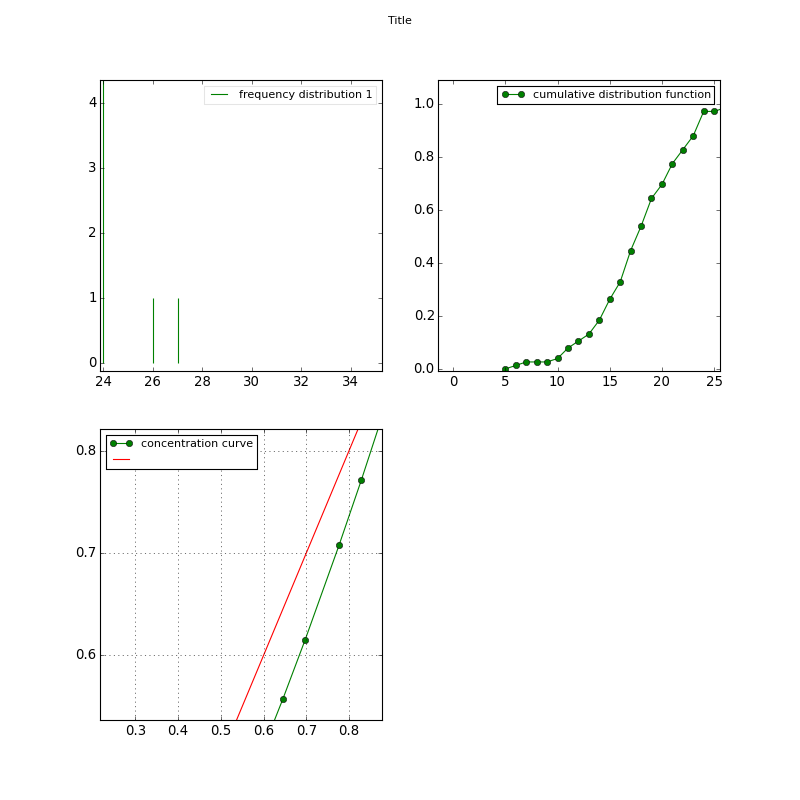

In [5]:
plotable = meri1.get_plotable()
plotable
plotter = plot.mplotlib()
fig = plotter.plot(plotable, 'Title', show=False)